In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/data.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Checking DataTypes of Columns


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data.shape

(1000, 8)

In [5]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No Column have any NULL value in it

In [6]:
data.duplicated().sum()

0

No Column have any NULL value in it

In [7]:
data.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [8]:
data.race_ethnicity.value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [9]:
data.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [10]:
data.parental_level_of_education.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [11]:
data.lunch.value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [12]:
data.test_preparation_course.value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

(array([24.,  9., 13.,  2., 13.,  3.,  7.,  6.,  2.,  2.]),
 array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ]),
 <BarContainer object of 10 artists>)

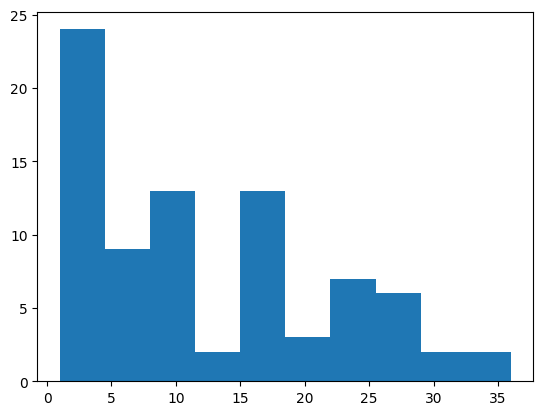

In [13]:
plt.hist(data.math_score.value_counts())

(array([17.,  9.,  6.,  5.,  9.,  8.,  5.,  7.,  3.,  3.]),
 array([ 1. ,  4.3,  7.6, 10.9, 14.2, 17.5, 20.8, 24.1, 27.4, 30.7, 34. ]),
 <BarContainer object of 10 artists>)

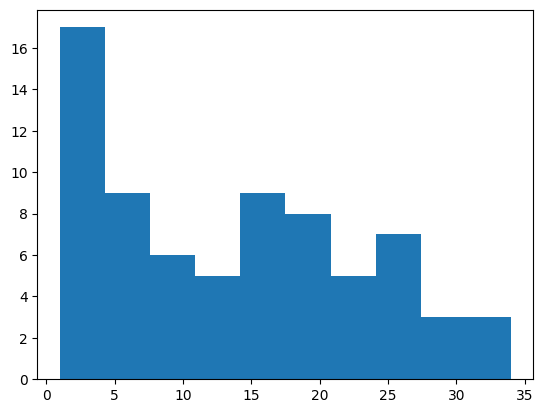

In [14]:
plt.hist(data.reading_score.value_counts())

(array([20.,  4., 15.,  8.,  4.,  8.,  7.,  8.,  1.,  2.]),
 array([ 1. ,  4.4,  7.8, 11.2, 14.6, 18. , 21.4, 24.8, 28.2, 31.6, 35. ]),
 <BarContainer object of 10 artists>)

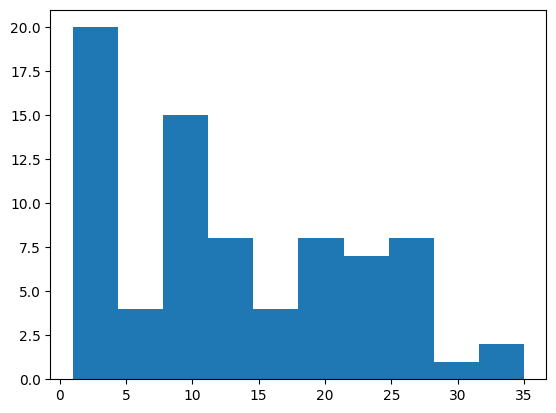

In [15]:
plt.hist(data.writing_score.value_counts())

# Feature Engineering

In [16]:
numberical_variables = [feature for feature in data.columns if data[feature].dtype != 'O']
numberical_variables


['math_score', 'reading_score', 'writing_score']

In [18]:
categorical_variables = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_variables


['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [19]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

data['total_score']

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Name: total_score, Length: 1000, dtype: int64

In [21]:
data['average'] = data['total_score']/3

data['average']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average, Length: 1000, dtype: float64

In [22]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [26]:
data[data['math_score'] == 100]['average'].count()

7

In [27]:
data[data['reading_score'] == 100]['average'].count()

17

In [28]:
data[data['writing_score'] == 100]['average'].count()

14

In [39]:
data[data['total_score'] == 300]['average'].count()

3

In [32]:
data['total_score'].describe()

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: total_score, dtype: float64

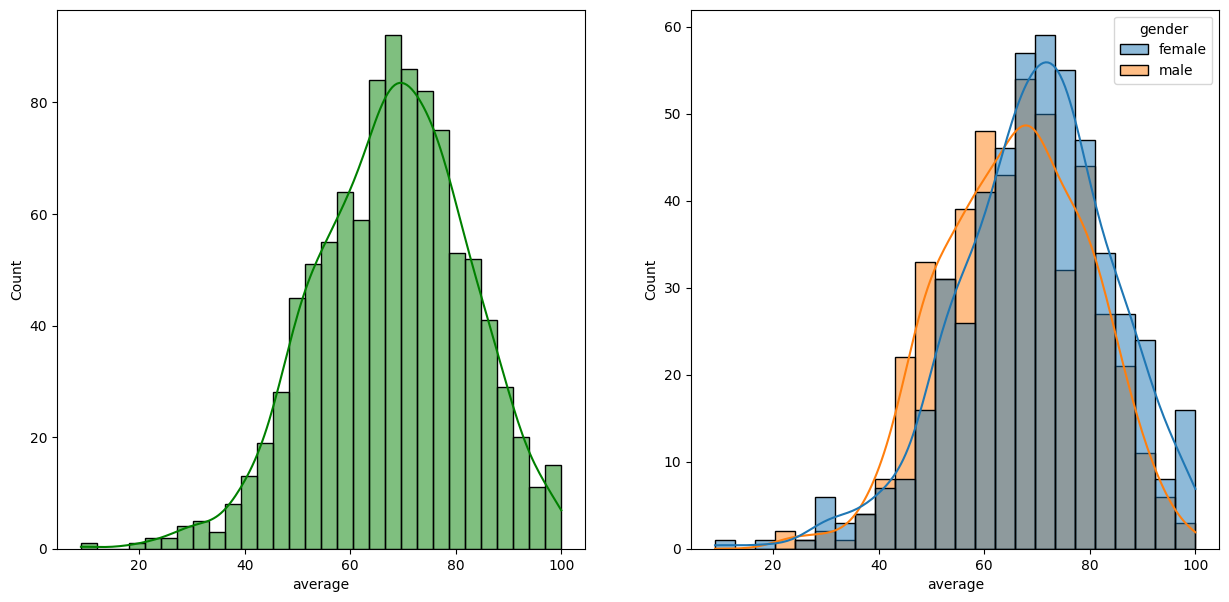

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data, x='average', bins=30,color='g')
plt.subplot(122)
sns.histplot(data=data, x='average', kde=True, hue='gender')
plt.show()

100